In [1043]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [1044]:
# Path
path=r'/Users/kristenlehtinen/Documents/Careerfoundry/Instacart Basket Analysis'

In [1045]:
# Importing ords_prods_cust_merge data 
ords_prods_cust_clean = pd.read_pickle(r'/Users/kristenlehtinen/Documents/Careerfoundry/Instacart Basket Analysis/02 Data/Prepared Data/ords_prods_cust_merge.pkl')

In [1046]:
ords_prods_cust_clean.head()

,user_id,First Name,Last name,Gender,STATE,Age,date_joined,dependents,fam_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_day,Busiest days,busiest_hours,max_order,loyalty_flag,mean_product_price,spending flag,Frequency flag,region,Customer_type
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2543867,5,1,9,30.0,2,0,both,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low Spender,Regular customer,Midwest,"parent, old, high income"
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,1285508,7,5,15,11.0,1,1,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,Regular customer,Midwest,"parent, old, high income"
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2578584,8,1,15,10.0,2,1,both,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low Spender,Regular customer,Midwest,"parent, old, high income"
6,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,2543867,5,1,9,30.0,1,1,both,Low-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low Spender,Regular customer,Midwest,"parent, old, high income"
7,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,2505178,6,1,8,21.0,1,1,both,Low-range product,Regularly busy,Busiest days,Average orders,8,New customer,7.988889,Low Spender,Regular customer,Midwest,"parent, old, high income"


In [1047]:
# mapping department with names 
department_mapping = {
    1: 'frozen',
    2: 'other',
    3: 'bakery',
    4: 'produce',
    5: 'alcohol',
    6: 'international',
    7: 'beverages', 
    8: 'pets',
    9: 'dry goods pasta',
    10: 'bulk',
    11: 'personal care',
    12: 'meat, seafood',
    13: 'pantry',
    14: 'breakfast',
    15: 'canned goods',
    16: 'dairy eggs',
    17: 'household',
    18: 'babies',
    19: 'snacks',
    20: 'deli',
    21: 'missing'
}

In [1048]:
#adding coulumn with department
ords_prods_cust_clean['department'] = ords_prods_cust_clean['department_id'].map(department_mapping)

In [1049]:
# Custom colors
colors = ['midnightblue', 'navy', 'steelblue', 'lightseagreen', 'c', 'mediumaquamarine']

In [1050]:
ords_prods_cust_clean.shape

(7472965, 35)

# 2. Security Implications

#### The Pll data would be the first name, last name, gender, age, dependents, family status, income. If this was a real project for a company, I would contact a senior data analyst and find out what the protocol is for identifying information.

# 3. Creating new variable basing the states on regions

In [1051]:
northeast_states = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [1052]:
midwest_states= ['Wisconsin', 'Michigan' , 'Illinois' ,'Indiana' , 'Ohio','North Dakota', 'South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']

In [1053]:
south_states = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina', 'South Carolina', 'Georgia', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Florida', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [1054]:
west_states = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [1055]:
result = []

for value in ords_prods_cust_clean['STATE']:
  if value in northeast_states:
    result.append("Northeast")
  elif value in midwest_states:
    result.append("Midwest")
  elif value in south_states:
    result.append("South")
  elif value in west_states:
    result.append("West")

In [1056]:
result

['Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'We

In [1057]:
ords_prods_cust_merge['region']=result

In [1058]:
ords_prods_cust_merge['region'].value_counts(dropna=False)

region
South        2506436
West         1888340
Midwest      1737561
Northeast    1340628
Name: count, dtype: int64

In [1059]:
crosstab = pd.crosstab(ords_prods_cust_merge['spending flag'], ords_prods_cust_merge['region'], dropna = False)

In [1060]:
crosstab.to_clipboard()

# 4. Exclusion flag for low-activity customers

In [1061]:
ords_prods_cust_clean.columns

Index(['user_id', 'First Name', 'Last name', 'Gender', 'STATE', 'Age',
       'date_joined', 'dependents', 'fam_status', 'income', 'product_id',
       'product_name', 'aisle_id', 'department_id', 'prices', 'order_id',
       'order_number', 'orders_day_of_week', 'order_time_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered', '_merge',
       'price_range_loc', 'busiest_day', 'Busiest days', 'busiest_hours',
       'max_order', 'loyalty_flag', 'mean_product_price', 'spending flag',
       'Frequency flag', 'region', 'Customer_type', 'department'],
      dtype='object')

In [1062]:
# Creating exclusion flag
ords_prods_cust_merge['exclusion_flag'] = ords_prods_cust_merge['order_number'].apply(lambda x: 'Yes' if x < 5 else 'No')

In [1063]:
# exluding data that had less than 5 orders
filtered_df = ords_prods_cust_merge[ords_prods_cust_merge['exclusion_flag'] != 'Yes']

In [1064]:
filtered_df.head()

,user_id,First Name,Last name,Gender,STATE,Age,date_joined,dependents,fam_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_day,Busiest days,busiest_hours,max_order,loyalty_flag,mean_product_price,spending flag,Frequency flag,region,Customer_type,exclusion_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2543867,5,1,9,30.0,2,0,both,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low Spender,Regular customer,Midwest,"parent, old, high income",No
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,1285508,7,5,15,11.0,1,1,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,Regular customer,Midwest,"parent, old, high income",No
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2578584,8,1,15,10.0,2,1,both,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low Spender,Regular customer,Midwest,"parent, old, high income",No
6,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,2543867,5,1,9,30.0,1,1,both,Low-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low Spender,Regular customer,Midwest,"parent, old, high income",No
7,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,2505178,6,1,8,21.0,1,1,both,Low-range product,Regularly busy,Busiest days,Average orders,8,New customer,7.988889,Low Spender,Regular customer,Midwest,"parent, old, high income",No


In [1065]:
#exporting data with exclusion flag as pickle file 
filtered_df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'data_exclusion_flag_removed.pkl'))

# 5. What type of customer shops with Instacart?

In [1066]:
# Importing data with < 5 orders removed
ords_prods_cust_clean = pd.read_pickle(r'/Users/kristenlehtinen/Documents/Careerfoundry/Instacart Basket Analysis/02 Data/Prepared Data/data_exclusion_flag_removed.pkl')

In [1067]:
# Checking head 
ords_prods_cust_clean.head()

,user_id,First Name,Last name,Gender,STATE,Age,date_joined,dependents,fam_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_day,Busiest days,busiest_hours,max_order,loyalty_flag,mean_product_price,spending flag,Frequency flag,region,Customer_type,exclusion_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2543867,5,1,9,30.0,2,0,both,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low Spender,Regular customer,Midwest,"parent, old, high income",No
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,1285508,7,5,15,11.0,1,1,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,Regular customer,Midwest,"parent, old, high income",No
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2578584,8,1,15,10.0,2,1,both,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low Spender,Regular customer,Midwest,"parent, old, high income",No
6,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,2543867,5,1,9,30.0,1,1,both,Low-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low Spender,Regular customer,Midwest,"parent, old, high income",No
7,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,2505178,6,1,8,21.0,1,1,both,Low-range product,Regularly busy,Busiest days,Average orders,8,New customer,7.988889,Low Spender,Regular customer,Midwest,"parent, old, high income",No


In [1068]:
# Dropping exclusion_flag column
ords_prods_cust_clean.drop(columns=['exclusion_flag'], inplace=True)

In [1069]:
ords_prods_cust_clean.head()

,user_id,First Name,Last name,Gender,STATE,Age,date_joined,dependents,fam_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_day,Busiest days,busiest_hours,max_order,loyalty_flag,mean_product_price,spending flag,Frequency flag,region,Customer_type
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2543867,5,1,9,30.0,2,0,both,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low Spender,Regular customer,Midwest,"parent, old, high income"
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,1285508,7,5,15,11.0,1,1,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,Regular customer,Midwest,"parent, old, high income"
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2578584,8,1,15,10.0,2,1,both,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low Spender,Regular customer,Midwest,"parent, old, high income"
6,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,2543867,5,1,9,30.0,1,1,both,Low-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low Spender,Regular customer,Midwest,"parent, old, high income"
7,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,2505178,6,1,8,21.0,1,1,both,Low-range product,Regularly busy,Busiest days,Average orders,8,New customer,7.988889,Low Spender,Regular customer,Midwest,"parent, old, high income"


In [1070]:
ords_prods_cust_clean.columns

Index(['user_id', 'First Name', 'Last name', 'Gender', 'STATE', 'Age',
       'date_joined', 'dependents', 'fam_status', 'income', 'product_id',
       'product_name', 'aisle_id', 'department_id', 'prices', 'order_id',
       'order_number', 'orders_day_of_week', 'order_time_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered', '_merge',
       'price_range_loc', 'busiest_day', 'Busiest days', 'busiest_hours',
       'max_order', 'loyalty_flag', 'mean_product_price', 'spending flag',
       'Frequency flag', 'region', 'Customer_type'],
      dtype='object')

In [1071]:
def Customer_type(row):
    dependents = row['dependents']
    age = row['Age']
    income = row['income']
    
    if dependents == 0:
        if age <= 25:
            if income <= 75000:
                return 'single adult, young, low income'
            elif income < 150000:
                return 'single adult, young, mid income'
            else:
                return 'single adult, young, high income'
        elif 25 <= age <= 45:
            if income <= 75000:
                return 'single adult, mid, low income'
            elif income < 150000:
                return 'single adult, mid, mid income'
            else:
                return 'single adult, mid, high income'
        else:
            if income <= 75000:
                return 'single adult, old, low income'
            elif income < 150000:
                return 'single adult, old, mid income'
            else:
                return 'single adult, old, high income'
    else:
        if age <= 25:
            if income <= 75000:
                return 'parent, young, low income'
            elif income < 150000:
                return 'parent, young, mid income'
            else:
                return 'parent, young, high income'
        elif 25 <= age <= 45:
            if income <= 75000:
                return 'parent, mid, low income'
            elif income < 150000:
                return 'parent, mid, mid income'
            else:
                return 'parent, mid, high income'
        else:
            if income <= 75000:
                return 'parent, old, low income'
            elif income < 150000:
                return 'parent, old, mid income'
            else:
                return 'parent, old, high income'

# 6. Bar chart to show distribution of Customer_type

In [1072]:
ords_prods_cust_clean.columns

Index(['user_id', 'First Name', 'Last name', 'Gender', 'STATE', 'Age',
       'date_joined', 'dependents', 'fam_status', 'income', 'product_id',
       'product_name', 'aisle_id', 'department_id', 'prices', 'order_id',
       'order_number', 'orders_day_of_week', 'order_time_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered', '_merge',
       'price_range_loc', 'busiest_day', 'Busiest days', 'busiest_hours',
       'max_order', 'loyalty_flag', 'mean_product_price', 'spending flag',
       'Frequency flag', 'region', 'Customer_type'],
      dtype='object')

In [1073]:
# creating profile column and where to apply the results. Axis = 1 is all rows, axis = 0 is all columns
ords_prods_cust_clean['Customer_type'] = ords_prods_cust_clean.apply(Customer_type, axis=1)

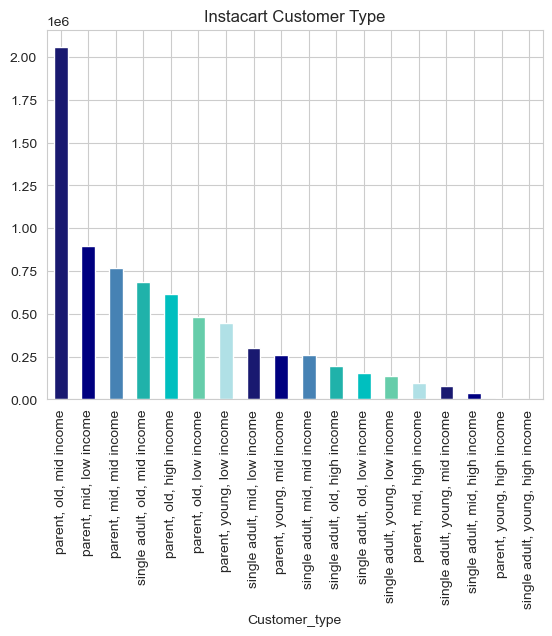

In [1074]:
# creating bar chart for profile counts
plt.title('Instacart Customer Type')
bar = ords_prods_cust_clean['Customer_type'].value_counts().plot.bar(color =['midnightblue', 'navy', 'steelblue', 'lightseagreen', 'c', 'mediumaquamarine', 'powderblue'])

#### This bar graph shows that the greatest demographic of instacart customers are older parents, 45+, who have a mid income. That demographic is then followed by parents who are 25-45 years of age who have a low income. The least common customer is a young parent, <25, with a high income. 

In [1075]:
#saving bar chart 
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_type.png'))

# 7. Aggregating the max, mean, and min variables on Customer_type for usage frequency and expenditure

In [1076]:
# performing mean, min, max aggregations for profile order num
ords_prods_cust_clean.groupby('Customer_type').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                                         mean min max
Customer_type                                        
parent, mid, high income            21.465356   5  99
parent, mid, low income             22.284102   5  99
parent, mid, mid income             21.710699   5  99
parent, old, high income            22.261463   5  99
parent, old, low income             21.676232   5  99
parent, old, mid income             21.616398   5  99
parent, young, high income          30.773422   5  99
parent, young, low income           22.095988   5  99
parent, young, mid income           22.910398   5  99
single adult, mid, high income      22.093614   5  99
single adult, mid, low income       22.207400   5  99
single adult, mid, mid income       21.998044   5  99
single adult, old, high income      21.394456   5  99
single adult, old, low income       22.835836   5  99
single adult, old, mid income       21.882330   5  99
single adult, young, high income    25.101247   5  67
single adult, young, low income     21.808699   5  99
single adult, young, mid income     22.128077   5  99

In [1077]:
# Performing aggregates min, mean, max on 'prices'
ords_prods_cust_clean.groupby('Customer_type').agg({'prices': ['mean', 'min', 'max']})

prices           
                                      mean  min   max
Customer_type                                        
parent, mid, high income          7.928974  1.0  25.0
parent, mid, low income           7.628991  1.0  25.0
parent, mid, mid income           7.955648  1.0  25.0
parent, old, high income          7.944587  1.0  25.0
parent, old, low income           6.910474  1.0  25.0
parent, old, mid income           7.954607  1.0  25.0
parent, young, high income        7.780290  1.0  25.0
parent, young, low income         7.715887  1.0  25.0
parent, young, mid income         7.928815  1.0  25.0
single adult, mid, high income    7.826684  1.0  25.0
single adult, mid, low income     7.590114  1.0  25.0
single adult, mid, mid income     7.945606  1.0  25.0
single adult, old, high income    7.964963  1.0  25.0
single adult, old, low income     6.903235  1.0  25.0
single adult, old, mid income     7.952668  1.0  25.0
single adult, young, high income  7.951219  1.0  25.0
single adult, young, low income   7.657846  1.0  25.0
single adult, young, mid income   7.928346  1.0  25.0

In [1078]:
pd.set_option('display.max_columns', None)

In [1079]:
ords_prods_cust_clean.head()

,user_id,First Name,Last name,Gender,STATE,Age,date_joined,dependents,fam_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_day,Busiest days,busiest_hours,max_order,loyalty_flag,mean_product_price,spending flag,Frequency flag,region,Customer_type
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2543867,5,1,9,30.0,2,0,both,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low Spender,Regular customer,Midwest,"parent, old, high income"
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,1285508,7,5,15,11.0,1,1,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,Regular customer,Midwest,"parent, old, high income"
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2578584,8,1,15,10.0,2,1,both,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low Spender,Regular customer,Midwest,"parent, old, high income"
6,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,2543867,5,1,9,30.0,1,1,both,Low-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low Spender,Regular customer,Midwest,"parent, old, high income"
7,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,2505178,6,1,8,21.0,1,1,both,Low-range product,Regularly busy,Busiest days,Average orders,8,New customer,7.988889,Low Spender,Regular customer,Midwest,"parent, old, high income"


# 8. Comparing Customer_type with regions and departments

In [1080]:
#grouping region and Customer_type 
region_Customer_type = ords_prods_cust_clean.groupby(['region', 'Customer_type']).size()

In [1081]:
# print
print (region_Customer_type)

region   Customer_type                   
Midwest  parent, mid, high income             23069
         parent, mid, low income             210950
         parent, mid, mid income             186709
         parent, old, high income            142289
         parent, old, low income             103210
                                              ...  
West     single adult, old, low income        39126
         single adult, old, mid income       167050
         single adult, young, high income       665
         single adult, young, low income      33374
         single adult, young, mid income      21377
Length: 71, dtype: int64


In [1082]:
# Index table comparing region and customer_type 
region_Customer_type = ords_prods_cust_clean.pivot_table(index='region', columns='Customer_type', aggfunc='size', fill_value=0)

In [1083]:
print(region_Customer_type)

Customer_type  parent, mid, high income  parent, mid, low income  \
region                                                             
Midwest                           23069                   210950   
Northeast                         19330                   153635   
South                             30762                   315397   
West                              24214                   215447   

Customer_type  parent, mid, mid income  parent, old, high income  \
region                                                             
Midwest                         186709                    142289   
Northeast                       141742                    106852   
South                           256642                    206468   
West                            183488                    157433   

Customer_type  parent, old, low income  parent, old, mid income  \
region                                                            
Midwest                         103210          

In [1084]:
# Grouping data by Customer_type, region, and department_id
grouped_data = ords_prods_cust_clean.groupby(['Customer_type', 'region', 'department_id']).size().reset_index(name='count')

In [1085]:
#setting style 
sns.set_style('whitegrid')

In [1086]:
# size 
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

/var/folders/ct/3q0tp4n574b6w7_tt9fvsllh0000gp/T/ipykernel_92267/1079241786.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=grouped_data, x='region', y='count', hue='department_name', ci=None, palette=custom_palette)


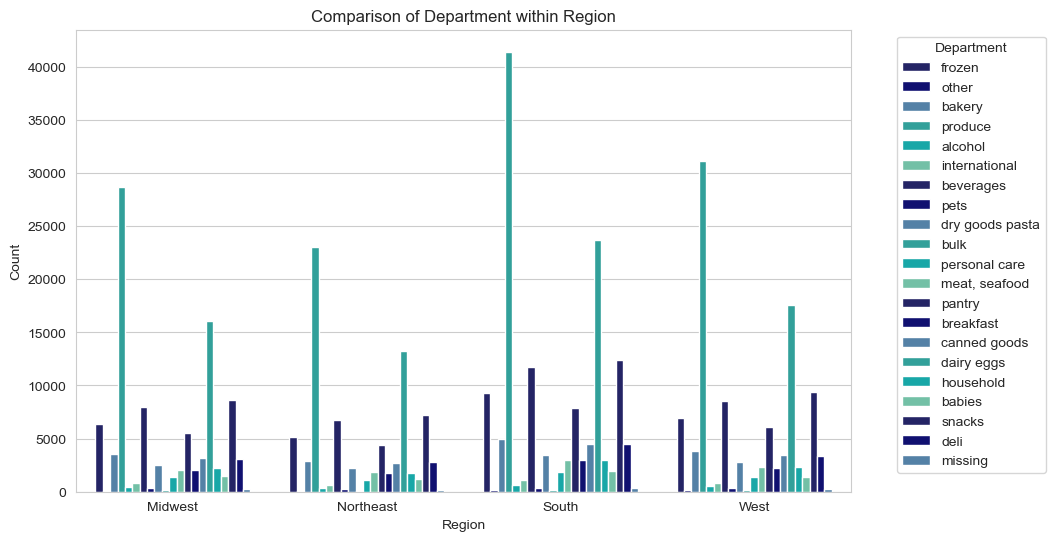

In [1087]:
# Custom colors
custom_palette = ['midnightblue', 'navy', 'steelblue', 'lightseagreen', 'c', 'mediumaquamarine']

# Map department_id to department names
grouped_data['department_name'] = grouped_data['department_id'].map(department_mapping)

# Plotting bar chart of department_name by region
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='region', y='count', hue='department_name', ci=None, palette=custom_palette)
plt.title('Comparison of Department within Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [1088]:
# Saving bar chart 
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_region_final.png')) 

<Figure size 640x480 with 0 Axes>

In [1089]:
# Filtering dataframe to only inlcude Midwest region
midwest_data = ords_prods_cust_clean[ords_prods_cust_clean['region'] == 'Midwest']

In [1090]:
# Grouping the filtered DataFrame by 'department_id' and count occurrences
grouped_data = midwest_data.groupby('department_id').size().reset_index(name='count')

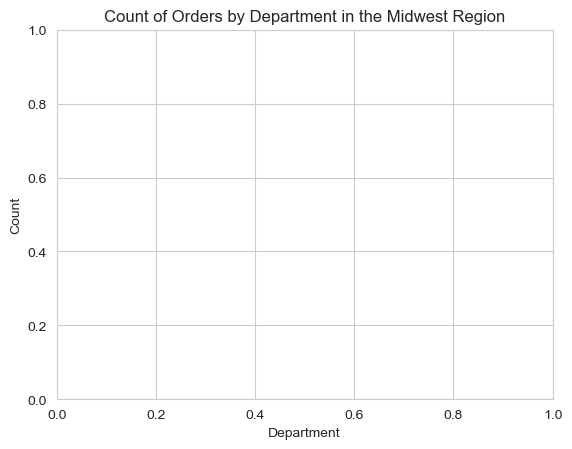

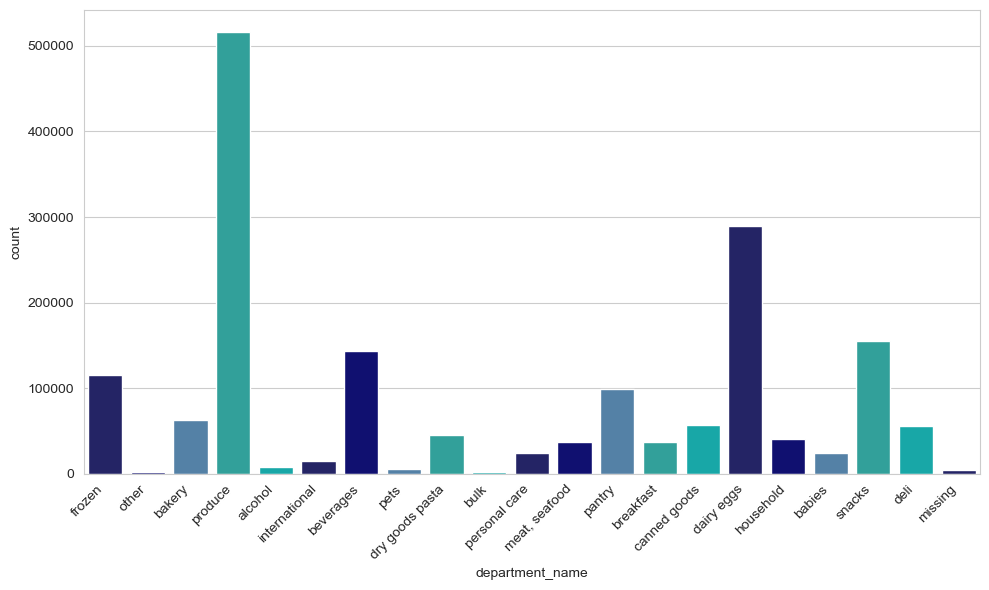

In [1091]:
# Custom colors
custom_palette = ['midnightblue', 'navy', 'steelblue', 'lightseagreen', 'c']

# Map department_id to department names
grouped_data['department_name'] = grouped_data['department_id'].map(department_mapping)

# Set the title and labels
plt.title('Count of Orders by Department in the Midwest Region')
plt.xlabel('Department')
plt.ylabel('Count')

# Plotting the bar chart with department names and custom palette
plt.figure(figsize=(10, 6))  # Create a single figure object
sns.barplot(data=grouped_data, x='department_name', y='count', palette=custom_palette)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [1092]:
# Saving bar chart 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'midwest_final.png'))

<Figure size 640x480 with 0 Axes>

In [1093]:
# 1. Filter the DataFrame to include only the data for the South region
South_data = ords_prods_cust_clean[ords_prods_cust_clean['region'] == 'South']

In [1094]:
# 2. Group the filtered DataFrame by 'department_id' and count occurrences
grouped_data = South_data.groupby('department_id').size().reset_index(name='count')

In [1095]:
# 3. Plot the bar chart
plt.figure(figsize=(10, 6))  # Set the size of the figure

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

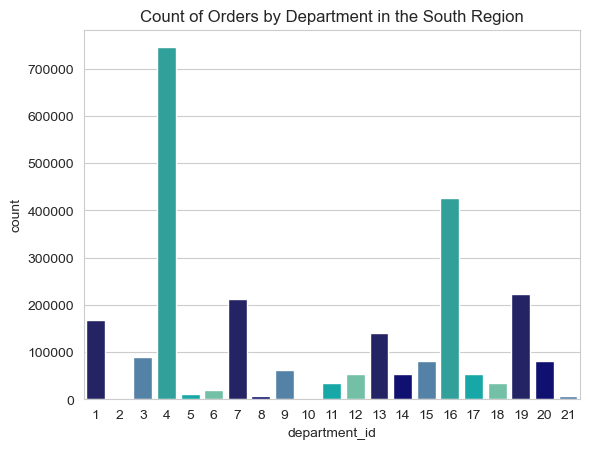

In [1096]:
# Custom colors
custom_palette = ['midnightblue', 'navy', 'steelblue', 'lightseagreen', 'c', 'mediumaquamarine']

# Set the title and labels
plt.title('Count of Orders by Department in the South Region')
plt.xlabel('Department ID')
plt.ylabel('Count')

# Plotting the bar chart for the South region with the custom palette
sns.barplot(data=grouped_data, x='department_id', y='count', palette=custom_palette)

# Show the plot
plt.show()

In [1097]:
# Saving bar chart 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'South_final.png'))

<Figure size 640x480 with 0 Axes>

In [1098]:
# 1. Filter the DataFrame to include only the data for the West region
West_data = ords_prods_cust_clean[ords_prods_cust_clean['region'] == 'West']

In [1099]:
# 2. Group the filtered DataFrame by 'department_id' and count occurrences
grouped_data = West_data.groupby('department_id').size().reset_index(name='count')

In [1100]:
# 3. Plot the bar chart
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

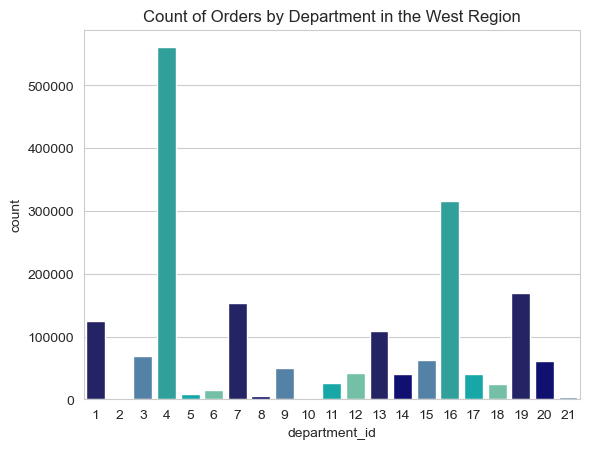

In [1101]:
# Custom colors
custom_palette = ['midnightblue', 'navy', 'steelblue', 'lightseagreen', 'c', 'mediumaquamarine']

# Set the title and labels
plt.title('Count of Orders by Department in the West Region')
plt.xlabel('Department ID')
plt.ylabel('Count')

# Plotting the bar chart for the West region with the custom palette
sns.barplot(data=grouped_data, x='department_id', y='count', palette=custom_palette)

# Show the plot
plt.show()

In [1102]:
# Saving image
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'West_final.png'))

In [1103]:
# 1. Filter the DataFrame to include only the data for the East region
Northeast_data = ords_prods_cust_clean[ords_prods_cust_clean['region'] == 'Northeast']

In [1104]:
grouped_data = Northeast_data.groupby('department_id').size().reset_index(name='count')

In [1105]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

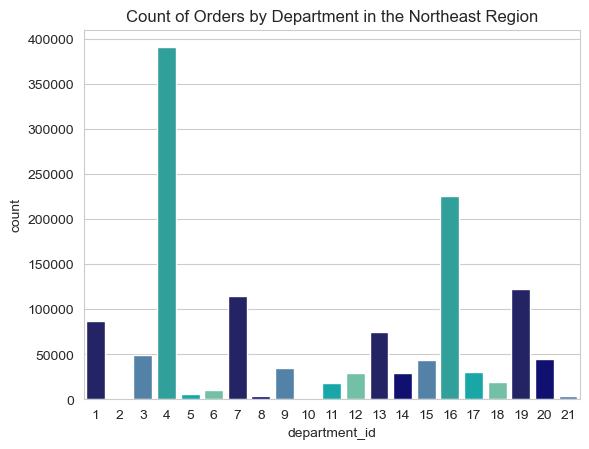

In [1106]:
# Custom colors
custom_palette = ['midnightblue', 'navy', 'steelblue', 'lightseagreen', 'c', 'mediumaquamarine']

# Set the title and labels
plt.title('Count of Orders by Department in the Northeast Region')
plt.xlabel('Department ID')
plt.ylabel('Count')

# Plotting the bar chart for the Northeast region with the custom palette
sns.barplot(data=grouped_data, x='department_id', y='count', palette=custom_palette)

# Show the plot
plt.show()

In [1107]:
# Saving image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Northeast_final.png'))

<Figure size 640x480 with 0 Axes>

In [1108]:
region_customer_type = ords_prods_cust_clean.groupby(['Customer_type', 'region']).size().reset_index(name='count')

In [1109]:
pivot_data = region_customer_type.pivot(index='Customer_type', columns='region', values='count').fillna(0)

In [1110]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

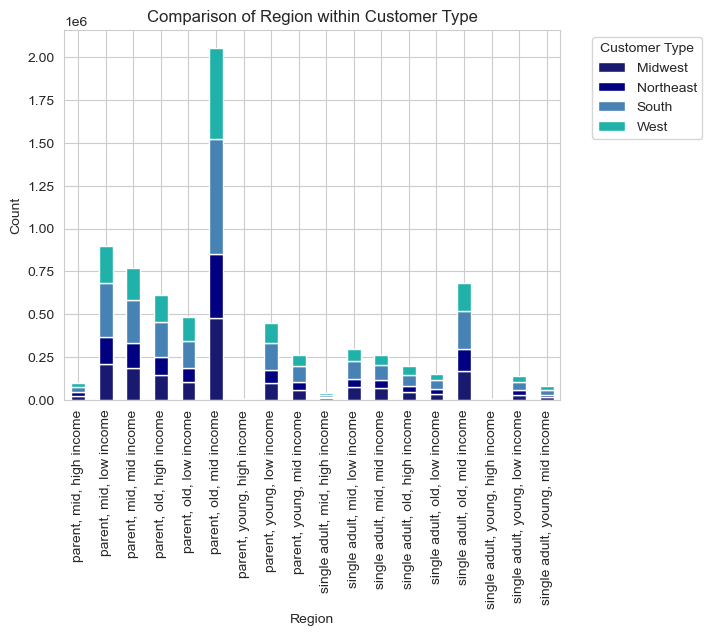

In [1111]:
# Define custom palette with 25 shades of blue
custom_palette = ['midnightblue', 'navy', 'steelblue', 'lightseagreen', 'c', 'mediumaquamarine']

# Plotting stacked bar chart based on customer_type and region 
pivot_data.plot(kind='bar', stacked=True, color=custom_palette)
plt.title('Comparison of Region within Customer Type')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Customer Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [1112]:
# Saving stacked bar chart 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_customer_type_comparison.png'))

<Figure size 640x480 with 0 Axes>

In [1113]:
pivot_data = region_customer_type.pivot(index='region', columns='Customer_type', values='count').fillna(0)

In [1114]:
# Setting Style 
sns.set_style('whitegrid')

In [1115]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

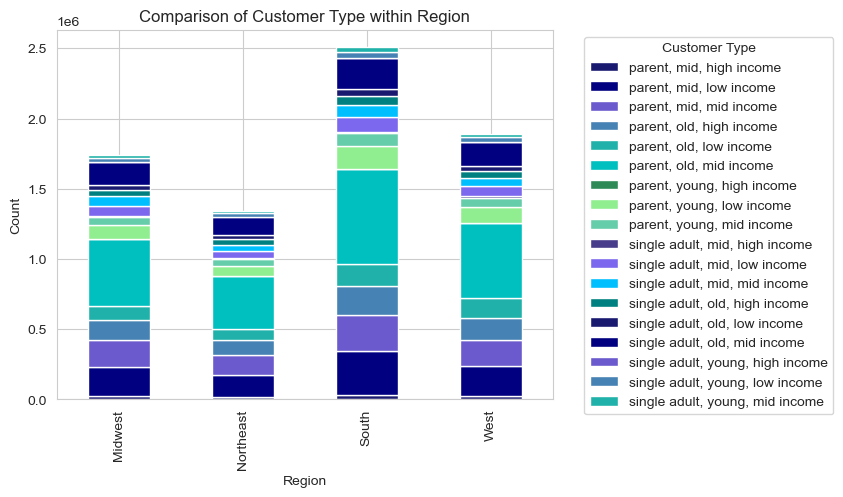

In [1116]:
# Plotting comparison of Customer Type within Region
# Custom colors
colors = ['midnightblue', 'navy', 'slateblue','steelblue', 'lightseagreen', 'c','seagreen','lightgreen', 'mediumaquamarine','darkslateblue','mediumslateblue','deepskyblue','teal']
pivot_data.plot(kind='bar', stacked=True, color=colors)
plt.title('Comparison of Customer Type within Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Customer Type', bbox_to_anchor=(1.05, 1), loc='upper left')

In [1117]:
# Save the plot with the specified file path
plt.savefig(os.path.join(path, 'region_customer_type_final.png'))

<Figure size 640x480 with 0 Axes>

In [1118]:
# Group the data by 'region', 'customer_profile', and 'gender' and count occurrences
grouped_data = ords_prods_cust_clean.groupby(['region','Gender']).size().unstack(fill_value=0)

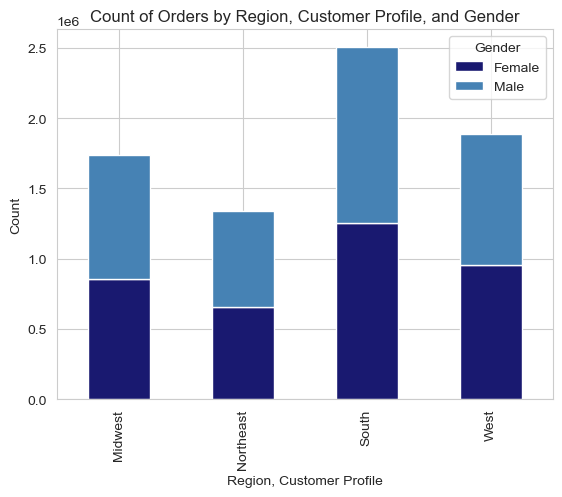

In [1119]:
# Custom colors
colors = ['midnightblue', 'steelblue', 'lightseagreen', 'c', 'mediumaquamarine']

# Create the stacked bar chart with custom colors
grouped_data.plot(kind='bar', stacked=True, color=colors)
plt.title('Count of Orders by Region, Customer Profile, and Gender')
plt.xlabel('Region, Customer Profile')
plt.ylabel('Count')
plt.show()

In [1120]:
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_customer_type_final.png'))

<Figure size 640x480 with 0 Axes>

In [1121]:
# Creating dataframe for box plot 
data = pd.DataFrame({
    'loyalty_flag': ['Loyal', 'Loyal', 'Non-loyal', 'Loyal', 'Non-loyal', 'Non-loyal'],
    'mean_product_price': [50, 60, 40, 55, 45, 50]
})

Text(0, 0.5, 'Mean Product Price')

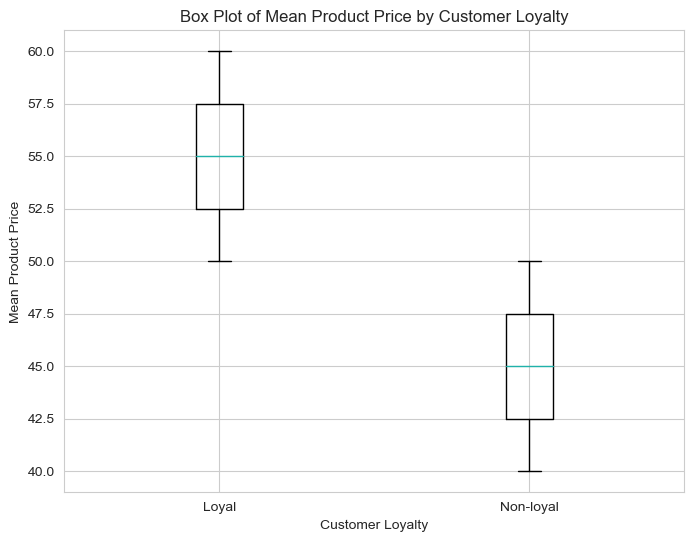

In [1122]:
# Create a box plot
plt.figure(figsize=(8, 6))  # Set the size of the figure
plt.boxplot([data[data['loyalty_flag'] == 'Loyal']['mean_product_price'],
             data[data['loyalty_flag'] == 'Non-loyal']['mean_product_price']],
            labels=['Loyal', 'Non-loyal'])
# Set the title and labels
plt.title('Box Plot of Mean Product Price by Customer Loyalty')
plt.xlabel('Customer Loyalty')
plt.ylabel('Mean Product Price')

In [1123]:
loyalty_product_stats = data.groupby('loyalty_flag')['mean_product_price'].agg(['count', 'mean'])
print(loyalty_product_stats)

              count  mean
loyalty_flag             
Loyal             3  55.0
Non-loyal         3  45.0


In [1124]:
# Saving image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'mean_product_price_by_customer_loyalty_final.png'))

<Figure size 640x480 with 0 Axes>

In [1125]:
# Sample data
data = pd.DataFrame({
    'Region': ['East', 'West', 'North', 'South', 'East', 'West', 'North', 'South'],
    'income': [50000, 60000, 70000, 80000, 90000, 55000, 65000, 75000]
})

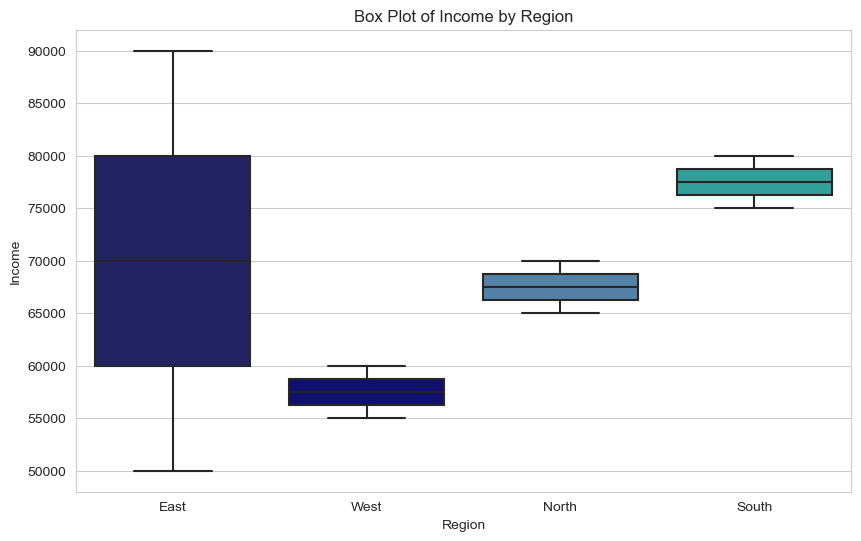

In [1126]:
# Create a box plot
plt.figure(figsize=(10, 6))  # Set the size of the figure
sns.boxplot(x='Region', y='income', data=data, palette=['midnightblue', 'navy', 'steelblue', 'lightseagreen', 'c', 'mediumaquamarine'])
# Set the title and labels
plt.title('Box Plot of Income by Region')
plt.xlabel('Region')
plt.ylabel('Income')
plt.show()

In [1127]:
# Saving image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_by_region_final.png'))

<Figure size 640x480 with 0 Axes>

In [1128]:
# Sample data for demonstration
data = pd.DataFrame({
    'product_department': ['Grocery', 'Produce', 'Dairy', 'Frozen', 'Grocery', 'Produce', 'Dairy', 'Frozen'],
    'price': [5, 6, 7, 8, 9, 5.5, 6.5, 7.5]
})

Text(0, 0.5, 'Price')

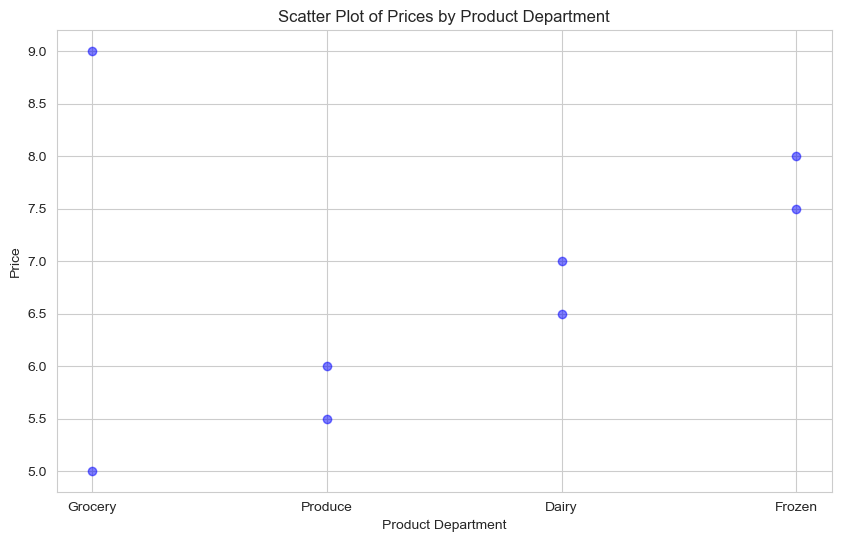

In [1129]:
# Create a scatter plot
plt.figure(figsize=(10, 6))  # Set the size of the figure
plt.scatter(data['product_department'], data['price'], color='blue', alpha=0.5)
# Set the title and labels
plt.title('Scatter Plot of Prices by Product Department')
plt.xlabel('Product Department')
plt.ylabel('Price')

In [1130]:
ords_prods_cust_new = pd.DataFrame({'price_range_loc': ['Low-range', 'Mid-range', 'Mid-range', 'High-range', 'Low-range', 'Mid-range']})

In [1131]:
# Group the data by 'price_range_loc' and count occurrences
counts = ords_prods_cust_new['price_range_loc'].value_counts()

Text(0, 0.5, 'Count')

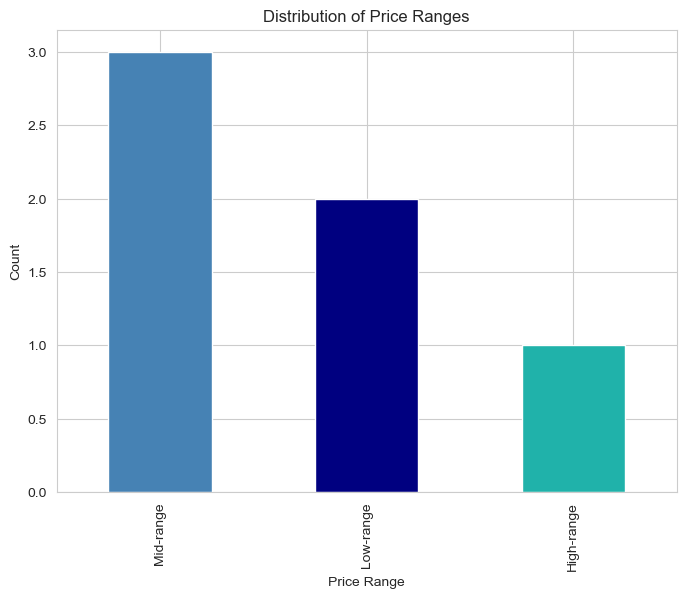

In [1132]:
# Plot a bar chart
plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color=['steelblue','navy','lightseagreen'])
# Add title and labels
plt.title('Distribution of Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Count')

In [1133]:
# Checking count number
price_range_loc_count = ords_prods_cust_clean['price_range_loc'].value_counts()
print(price_range_loc_count)

price_range_loc
nan                   4550375
Low-range product     2335835
Mid-range product      492460
High-range product      94295
Name: count, dtype: int64


In [1134]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_range_loc.png'))

In [1135]:
department_id_counts = ords_prods_cust_clean['department_id'].value_counts()
print(department_id_counts)

department_id
4     2213428
16    1258211
19     670156
7      623465
1      494612
13     423991
3      270897
15     242573
20     241541
9      193616
17     165971
14     160563
12     160530
18     102465
11     101940
6       60790
5       32318
8       21779
21      17496
10       8455
2        8168
Name: count, dtype: int64


In [1136]:
counts = ords_prods_cust_clean.groupby(['department_id', 'loyalty_flag']).size().unstack(fill_value=0)

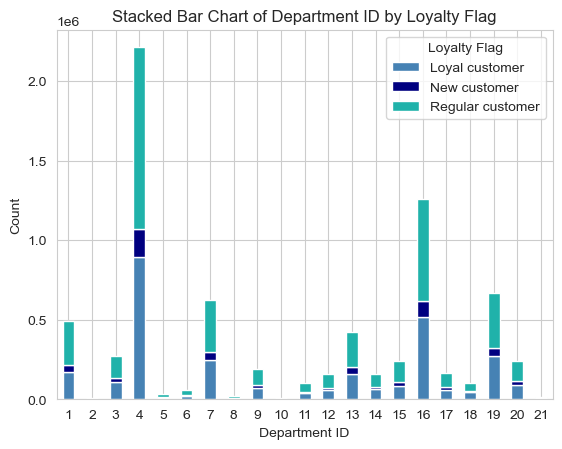

In [1137]:
# Plotting
counts.plot(kind='bar', stacked=True, color=['steelblue','navy','lightseagreen'])
plt.xlabel('Department ID')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Department ID by Loyalty Flag')
plt.xticks(rotation=0)
plt.legend(title='Loyalty Flag')
plt.show()

In [1138]:
# Create a pivot table to count occurrences of each combination of loyalty_flag and dependents
pivot_table = ords_prods_cust_clean.groupby(['loyalty_flag', 'dependents']).size().unstack(fill_value=0)

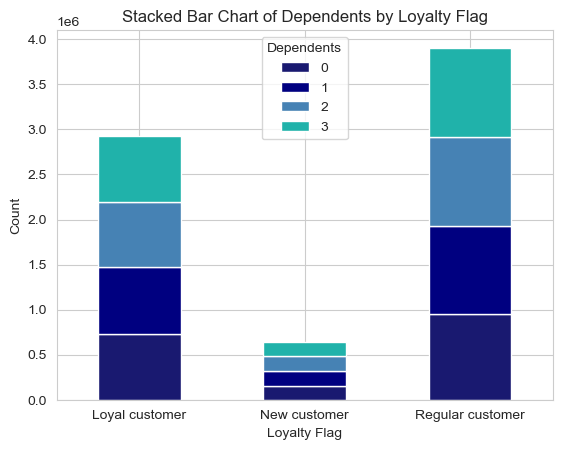

In [1139]:
# Plotting with custom colors
pivot_table.plot(kind='bar', stacked=True, color=['midnightblue', 'navy', 'steelblue', 'lightseagreen', 'c', 'mediumaquamarine', 'powderblue'])
plt.xlabel('Loyalty Flag')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Dependents by Loyalty Flag')
plt.xticks(rotation=0)
plt.legend(title='Dependents')
plt.show()

In [1140]:
# Custom colors
colors = ['midnightblue', 'navy', 'steelblue', 'lightseagreen', 'c', 'mediumaquamarine']

In [1141]:
# Saving image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_bar_dependents_loyalty_flag.png'))

<Figure size 640x480 with 0 Axes>

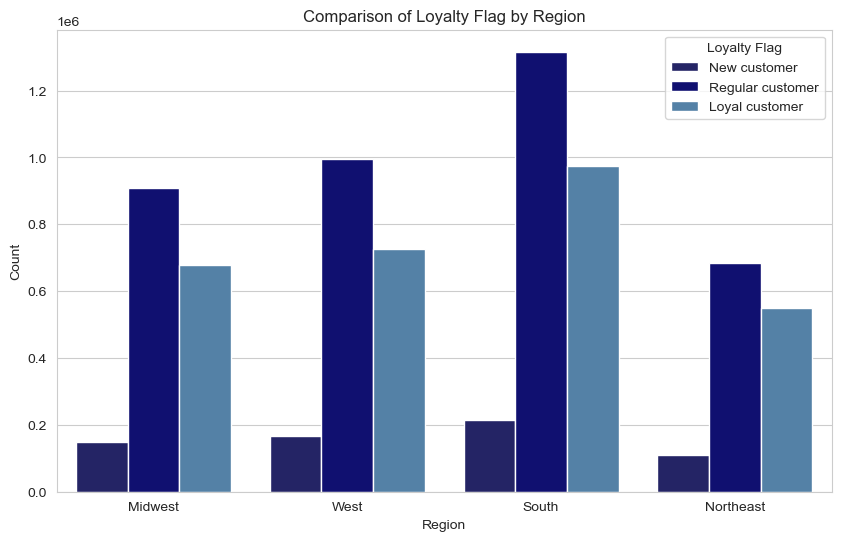

In [1142]:
# Custom colors
custom_palette = ['midnightblue', 'navy', 'steelblue', 'lightseagreen', 'c', 'mediumaquamarine']

# Plot count plot of loyalty_flag by region with custom palette
plt.figure(figsize=(10, 6))
sns.countplot(data=ords_prods_cust_clean, x='region', hue='loyalty_flag', palette=custom_palette)
plt.title('Comparison of Loyalty Flag by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Loyalty Flag')
plt.show()

In [1143]:
# Saving image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_flag_region.png'))

<Figure size 640x480 with 0 Axes>

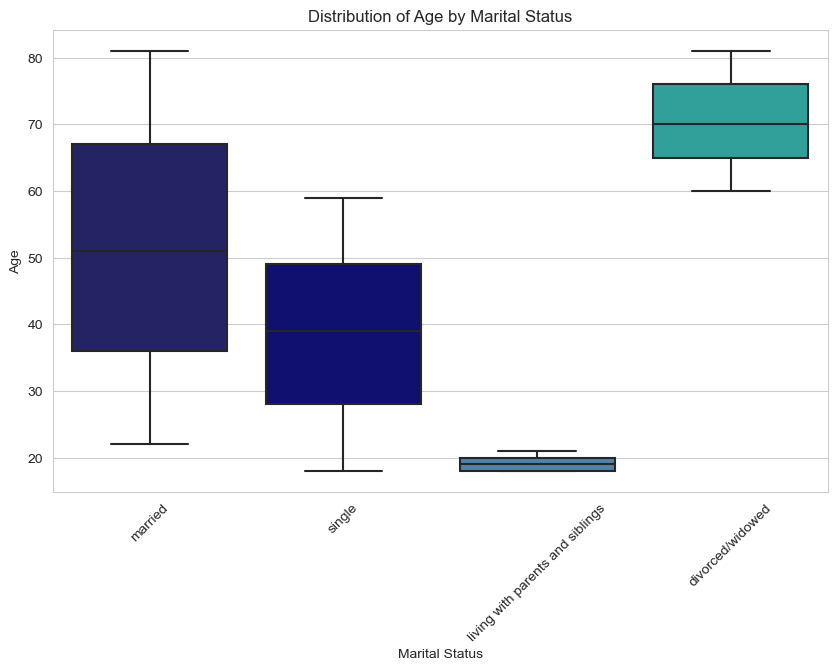

In [1144]:
# Custom colors
colors = ['midnightblue', 'navy', 'steelblue', 'lightseagreen', 'c', 'mediumaquamarine']

# Create a box plot with custom colors for each marital status category
plt.figure(figsize=(10, 6))
sns.boxplot(data=ords_prods_cust_clean, x='fam_status', y='Age', palette=colors)
plt.title('Distribution of Age by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [1145]:
plt.savefig (os.path.join(path, '04 Analysis', 'Visualizations', 'age_marital_statustype.png'))

<Figure size 640x480 with 0 Axes>

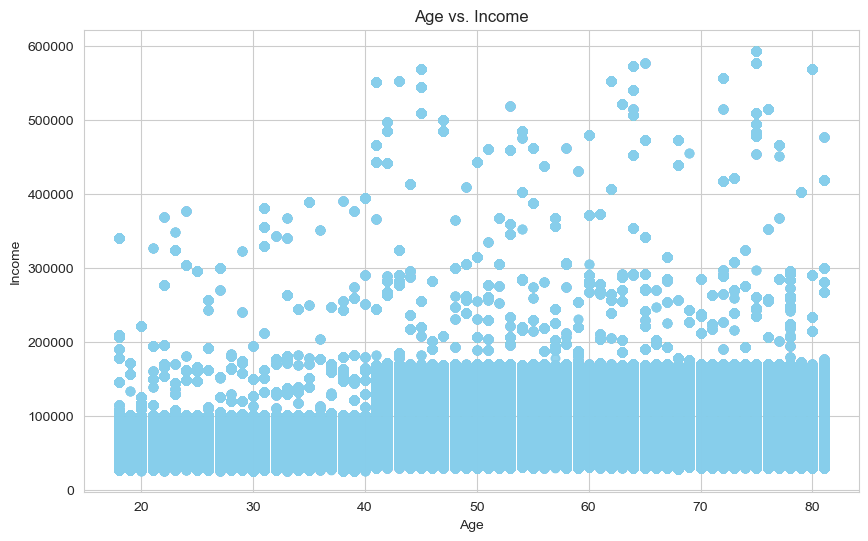

In [1146]:
# Create a scatter plot of age vs. income
plt.figure(figsize=(10, 6))
plt.scatter(ords_prods_cust_clean['Age'], ords_prods_cust_clean['income'], color='skyblue', alpha=0.5)
plt.title('Age vs. Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid(True)  # Add grid lines for better readability
plt.show()

In [1147]:
plt.savefig (os.path.join(path, '04 Analysis', 'Visualizations', 'age_vs_income_scattered.png'))

<Figure size 640x480 with 0 Axes>

/var/folders/ct/3q0tp4n574b6w7_tt9fvsllh0000gp/T/ipykernel_92267/1905823757.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order_totals_age_group = ords_prods_cust_clean.groupby('Age_Group')['order_id'].count()


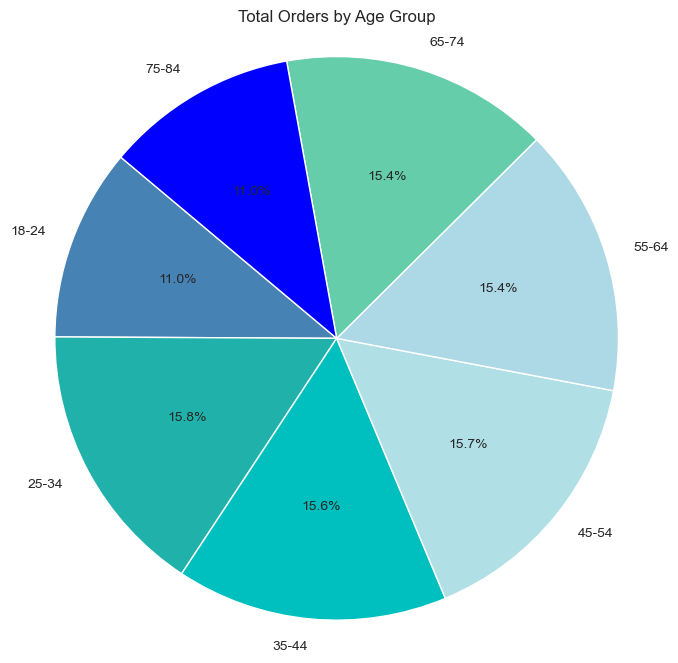

In [1148]:
# Define bins and labels for age groups
bins = [18, 25, 35, 45, 55, 65, 75, 85]  # Example age group bins
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84']  # Labels for age groups
# Define age groups
ords_prods_cust_clean['Age_Group'] = pd.cut(ords_prods_cust_clean['Age'], bins=bins, labels=labels, right=False)

# Group by age group and calculate the total number of orders
order_totals_age_group = ords_prods_cust_clean.groupby('Age_Group')['order_id'].count()

# Custom colors
colors = ['steelblue', 'lightseagreen', 'c','powderblue','lightblue', 'mediumaquamarine','blue']

# Plot the results as a pie chart with custom colors
plt.figure(figsize=(8, 8))
plt.pie(order_totals_age_group, labels=order_totals_age_group.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Total Orders by Age Group')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [1149]:
plt.savefig (os.path.join(path, '04 Analysis', 'Visualizations', 'pie_chart_age_groups.png'))

<Figure size 640x480 with 0 Axes>

/var/folders/ct/3q0tp4n574b6w7_tt9fvsllh0000gp/T/ipykernel_92267/1328959380.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orders_fam_time = ords_prods_cust_clean.groupby(['fam_status', 'order_time_of_day']).size().unstack()


<Figure size 1000x600 with 0 Axes>

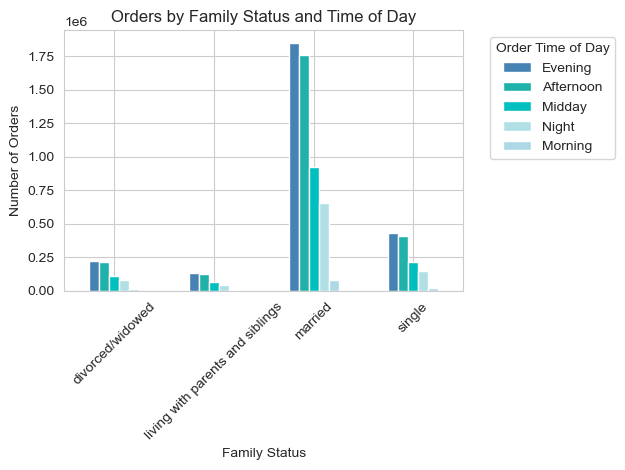

In [1150]:
# Color palette
colors = ['steelblue', 'lightseagreen', 'c', 'powderblue', 'lightblue', 'mediumaquamarine', 'blue']

# Convert 'order_time_of_day' column to numeric values
ords_prods_cust_clean['order_time_of_day'] = pd.to_numeric(ords_prods_cust_clean['order_time_of_day'])

# Aggregate time intervals
ords_prods_cust_clean['order_time_of_day'] = pd.cut(ords_prods_cust_clean['order_time_of_day'], bins=5, labels=['Morning', 'Midday', 'Afternoon', 'Evening', 'Night'])

# Group by family status and order time of day, and calculate the count of orders
orders_fam_time = ords_prods_cust_clean.groupby(['fam_status', 'order_time_of_day']).size().unstack()

# Sort the data by total orders
orders_fam_time = orders_fam_time.reindex(orders_fam_time.sum().sort_values(ascending=False).index, axis=1)

# Plot the results as a grouped bar plot
plt.figure(figsize=(10, 6))
sns.set_palette(colors)  # Use your custom color palette
orders_fam_time.plot(kind='bar', stacked=False)
plt.title('Orders by Family Status and Time of Day')
plt.xlabel('Family Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='Order Time of Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [1179]:
# Save 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_chart_orders_family_time.png'))

<Figure size 640x480 with 0 Axes>

/var/folders/ct/3q0tp4n574b6w7_tt9fvsllh0000gp/T/ipykernel_92267/1044463087.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orders_age_spending = ords_prods_cust_clean.groupby(['Age_Group', 'spending flag']).size().unstack()


<Figure size 1000x600 with 0 Axes>

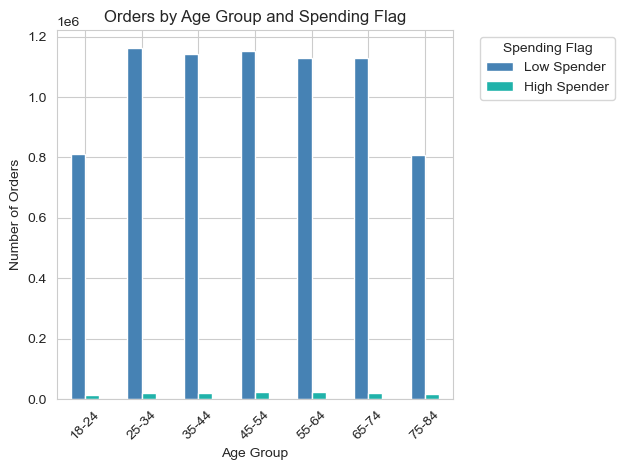

In [1151]:
# Define your custom color palette
colors = ['steelblue', 'lightseagreen', 'c', 'powderblue', 'lightblue', 'mediumaquamarine', 'blue']

# Group by age and spending flag, and calculate the count of orders
orders_age_spending = ords_prods_cust_clean.groupby(['Age_Group', 'spending flag']).size().unstack()

# Sort the data by total orders
orders_age_spending = orders_age_spending.reindex(orders_age_spending.sum().sort_values(ascending=False).index, axis=1)

# Plot the results as a grouped bar plot
plt.figure(figsize=(10, 6))
sns.set_palette(colors)  # Use your custom color palette
orders_age_spending.plot(kind='bar', stacked=False)
plt.title('Orders by Age Group and Spending Flag')
plt.xlabel('Age Group')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='Spending Flag', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [1180]:
# Save 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_spending_flag.png'))

<Figure size 640x480 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

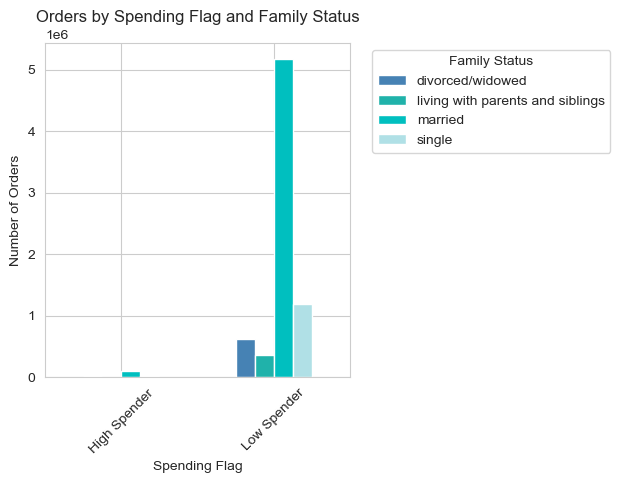

In [1152]:
# Define your custom color palette
colors = ['steelblue', 'lightseagreen', 'c', 'powderblue', 'lightblue', 'mediumaquamarine', 'blue']

# Group by spending flag and family status, and calculate the count of orders
orders_spending_fam = ords_prods_cust_clean.groupby(['spending flag', 'fam_status']).size().unstack()

# Plot the results as a grouped bar plot
plt.figure(figsize=(10, 6))
sns.set_palette(colors)  # Use your custom color palette
orders_spending_fam.plot(kind='bar', stacked=False)
plt.title('Orders by Spending Flag and Family Status')
plt.xlabel('Spending Flag')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='Family Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [1181]:
# Save 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending_flag_family_status.png'))

<Figure size 640x480 with 0 Axes>

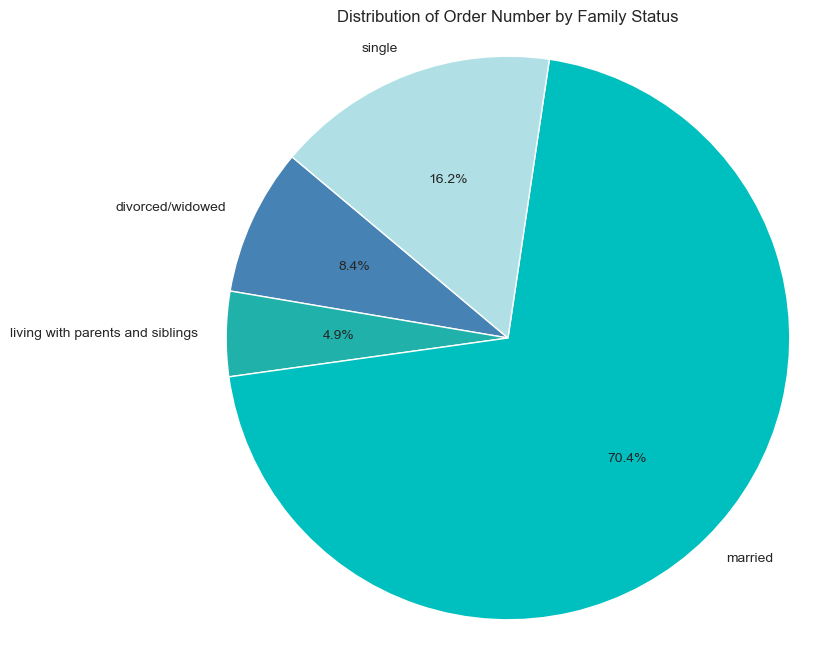

In [1153]:
# Group by family status and calculate the total number of orders for each category
order_totals_fam_status = ords_prods_cust_clean.groupby('fam_status')['order_number'].count()

# Plot the results as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(order_totals_fam_status, labels=order_totals_fam_status.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Order Number by Family Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [1182]:
# Save 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_number_family_status.png'))

<Figure size 640x480 with 0 Axes>

/var/folders/ct/3q0tp4n574b6w7_tt9fvsllh0000gp/T/ipykernel_92267/1788091502.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orders_age_time = ords_prods_cust_clean.groupby(['Age_Group', 'order_time_of_day']).size().unstack()


<Figure size 1000x600 with 0 Axes>

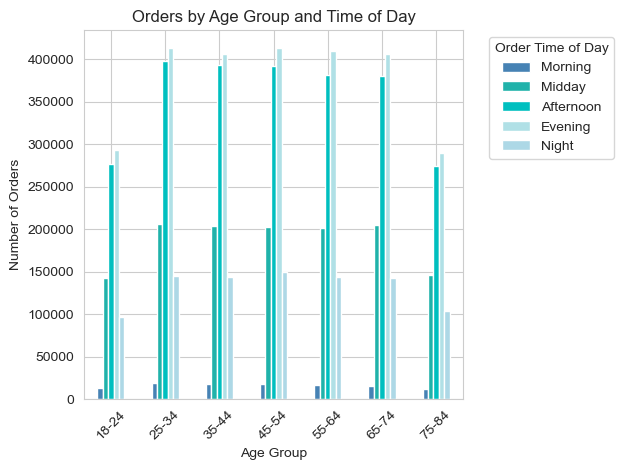

In [1154]:
# Group by age group and order time of day, and calculate the count of orders
orders_age_time = ords_prods_cust_clean.groupby(['Age_Group', 'order_time_of_day']).size().unstack()

# Plot the results as a grouped bar plot
plt.figure(figsize=(10, 6))
orders_age_time.plot(kind='bar', stacked=False)
plt.title('Orders by Age Group and Time of Day')
plt.xlabel('Age Group')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='Order Time of Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [1183]:
# Save 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_time_of_day.png'))

<Figure size 640x480 with 0 Axes>

/var/folders/ct/3q0tp4n574b6w7_tt9fvsllh0000gp/T/ipykernel_92267/2859831623.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orders_age_day_of_week = ords_prods_cust_clean.groupby(['Age_Group', 'orders_day_of_week']).size().unstack()


<Figure size 1000x600 with 0 Axes>

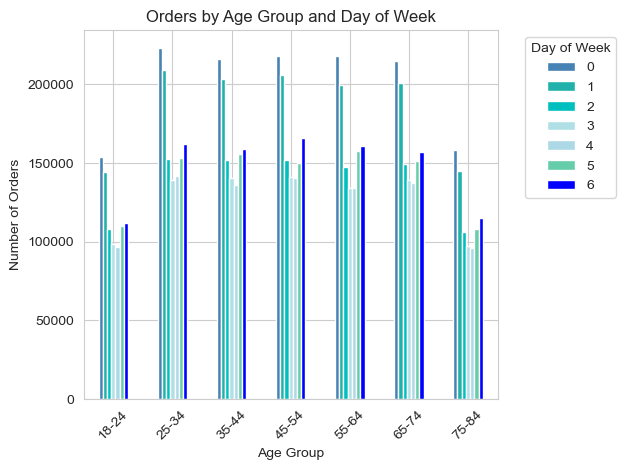

In [1155]:
# Group by age group and order day of week, and calculate the count of orders
orders_age_day_of_week = ords_prods_cust_clean.groupby(['Age_Group', 'orders_day_of_week']).size().unstack()

# Plot the results as a grouped bar plot
plt.figure(figsize=(10, 6))
orders_age_day_of_week.plot(kind='bar', stacked=False)
plt.title('Orders by Age Group and Day of Week')
plt.xlabel('Age Group')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='Day of Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [1184]:
# Save 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_day_of_week.png'))

<Figure size 640x480 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

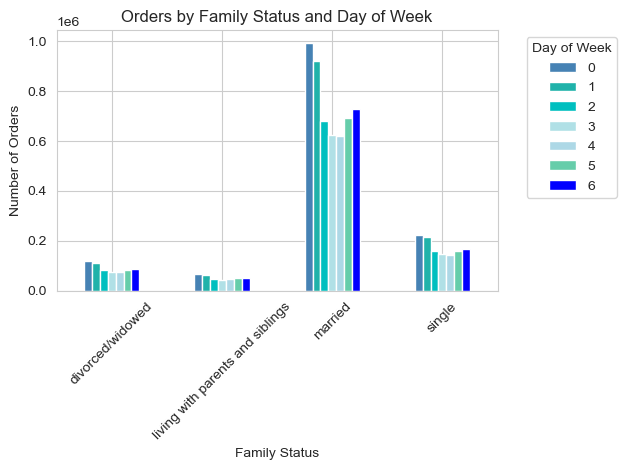

In [1156]:
# Group by family status and order day of week, and calculate the count of orders
orders_fam_day_of_week = ords_prods_cust_clean.groupby(['fam_status', 'orders_day_of_week']).size().unstack()

# Plot the results as a grouped bar plot
plt.figure(figsize=(10, 6))
orders_fam_day_of_week.plot(kind='bar', stacked=False)
plt.title('Orders by Family Status and Day of Week')
plt.xlabel('Family Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='Day of Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [1185]:
# Save 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_status_day_of_week.png'))

<Figure size 640x480 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

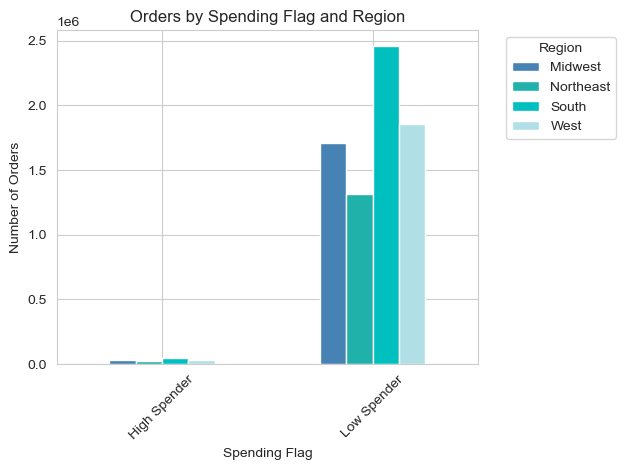

In [1157]:
# Group by spending flag and region, and calculate the count of orders
orders_spending_region = ords_prods_cust_clean.groupby(['spending flag', 'region']).size().unstack()

# Plot the results as a grouped bar plot
plt.figure(figsize=(10, 6))
orders_spending_region.plot(kind='bar', stacked=False)
plt.title('Orders by Spending Flag and Region')
plt.xlabel('Spending Flag')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [1186]:
# Save 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending_flag_region.png'))

<Figure size 640x480 with 0 Axes>

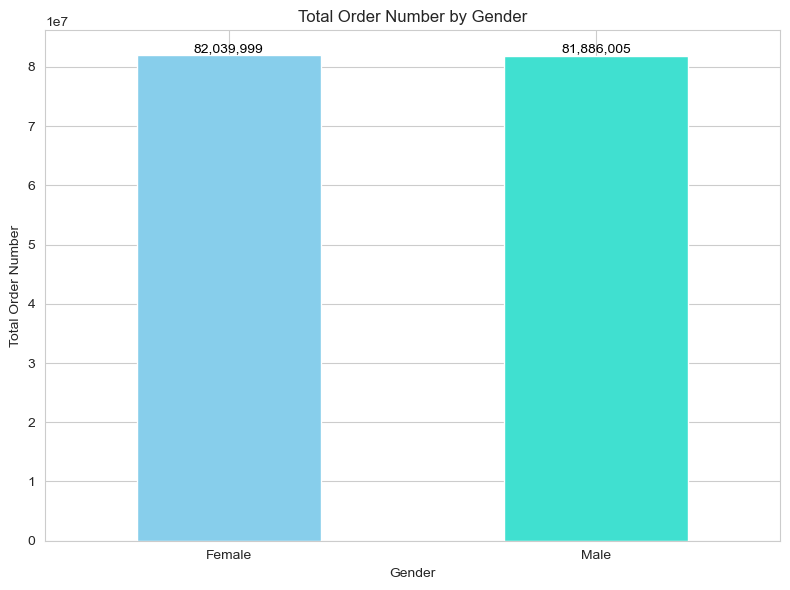

In [1158]:
# Group by gender and calculate the total order number per gender
orders_gender_total = ords_prods_cust_clean.groupby('Gender')['order_number'].sum()

# Plot the results as a bar chart with customized colors
plt.figure(figsize=(8, 6))
bars = orders_gender_total.plot(kind='bar', color=['skyblue', 'turquoise'])
plt.title('Total Order Number by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Order Number')
plt.xticks(rotation=0)
plt.grid(True)  # Add grid lines for better readability

# Add value counts inside the bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{int(bar.get_height()):,}', 
             ha='center', va='bottom', color='black')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [1187]:
# Save 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'total_order_gender.png'))

<Figure size 640x480 with 0 Axes>

In [1159]:
# Get the value counts of Gender
gender_value_counts = ords_prods_cust_clean['Gender'].value_counts()

# Print the value counts
print(gender_value_counts)

Gender
Male      3748517
Female    3724448
Name: count, dtype: int64


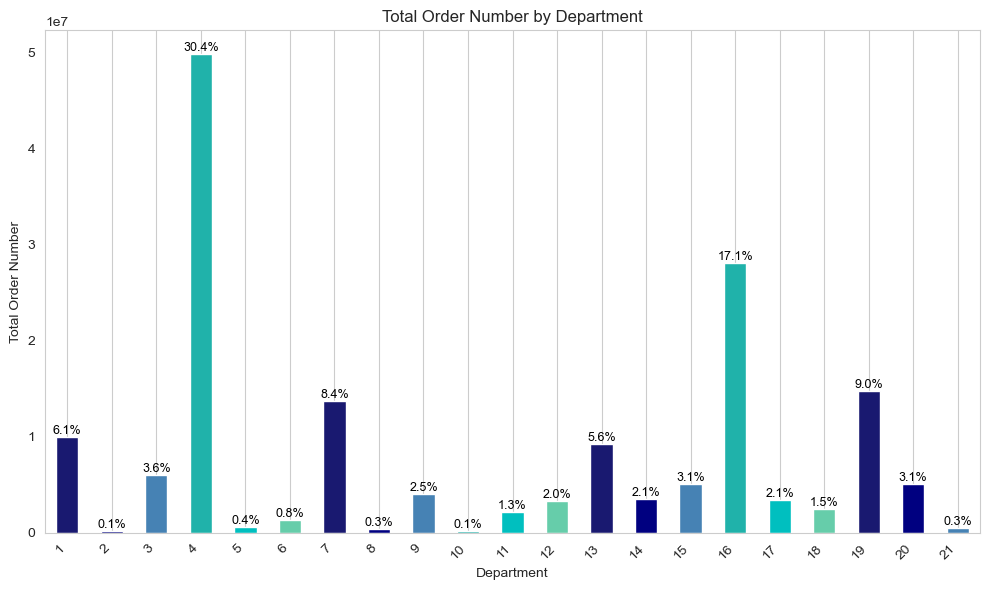

In [1160]:

# Group by department_id and calculate the total order number per department
orders_department_total = ords_prods_cust_clean.groupby('department_id')['order_number'].sum()

# Calculate the total number of orders
total_orders = orders_department_total.sum()

# Calculate the percentage of each department
percentages = (orders_department_total / total_orders) * 100

# Custom colors
colors = ['midnightblue', 'navy', 'steelblue', 'lightseagreen', 'c', 'mediumaquamarine']

# Plot the results as a bar chart with custom colors
plt.figure(figsize=(10, 6))
bars = orders_department_total.plot(kind='bar', color=colors)
plt.title('Total Order Number by Department')
plt.xlabel('Department')
plt.ylabel('Total Order Number')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')  # Add grid lines for better readability

# Add percentage labels above each bar
for bar, percentage in zip(bars.patches, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%', 
             ha='center', va='bottom', color='black', fontsize=9)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [1188]:
# Save 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'total_by_department.png'))

<Figure size 640x480 with 0 Axes>

In [1161]:
department_counts = ords_prods_cust_clean['department_id'].value_counts()

print(department_counts)

department_id
4     2213428
16    1258211
19     670156
7      623465
1      494612
13     423991
3      270897
15     242573
20     241541
9      193616
17     165971
14     160563
12     160530
18     102465
11     101940
6       60790
5       32318
8       21779
21      17496
10       8455
2        8168
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

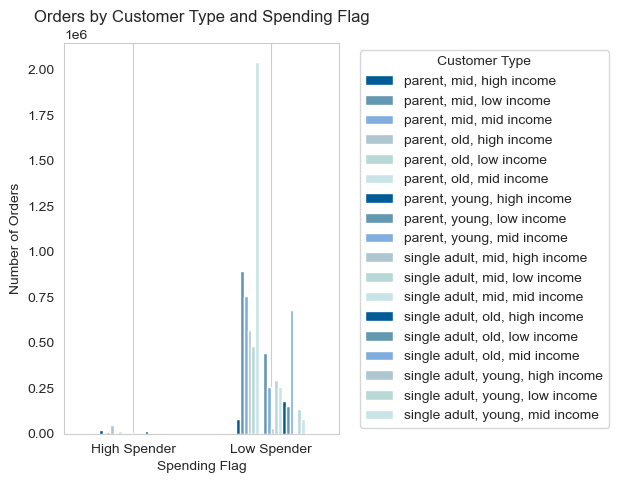

In [1162]:
# Group by Customer_type and spending_flag, and calculate the count of orders
orders_customer_spending = ords_prods_cust_clean.groupby(['Customer_type', 'spending flag']).size().unstack()

# Transpose the DataFrame
orders_customer_spending = orders_customer_spending.transpose()

# Custom colors with shades of blue
colors = ['#005b96', '#6497b1', '#7faddf', '#aec6cf', '#b8d8d8', '#c9e4e7']

# Plot the results as a grouped bar chart with custom colors
plt.figure(figsize=(10, 6))
orders_customer_spending.plot(kind='bar', stacked=False, color=colors)
plt.title('Orders by Customer Type and Spending Flag')
plt.xlabel('Spending Flag')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)

# Move the legend to the side
plt.legend(title='Customer Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(axis='y')  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [1189]:
# Save 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_type_spending_flag.png'))

<Figure size 640x480 with 0 Axes>

In [1163]:
# Group by Customer_type and department_id, and calculate the total orders
orders_by_customer_department = ords_prods_cust_clean.groupby(['Customer_type', 'department_id']).size().unstack()

# Find the Customer_type with the maximum orders for each department
max_customer_type = orders_by_customer_department.idxmax()

# Display the results
print(max_customer_type)

department_id
1     parent, old, mid income
2     parent, old, mid income
3     parent, old, mid income
4     parent, old, mid income
5     parent, old, mid income
6     parent, old, mid income
7     parent, old, mid income
8     parent, old, mid income
9     parent, old, mid income
10    parent, old, mid income
11    parent, old, mid income
12    parent, old, mid income
13    parent, old, mid income
14    parent, old, mid income
15    parent, old, mid income
16    parent, old, mid income
17    parent, old, mid income
18    parent, old, mid income
19    parent, old, mid income
20    parent, old, mid income
21    parent, old, mid income
dtype: object


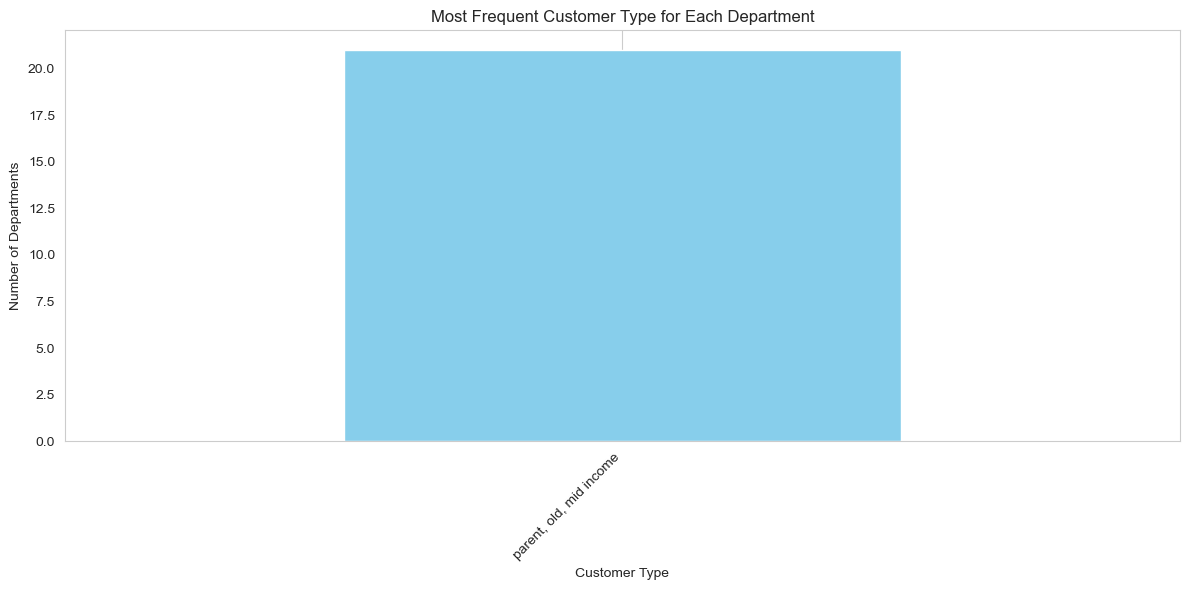

In [1164]:
# Group by Customer_type and department_id, and calculate the total orders
orders_by_customer_department = ords_prods_cust_clean.groupby(['Customer_type', 'department_id']).size().unstack()

# Find the Customer_type with the maximum orders for each department
max_customer_type = orders_by_customer_department.idxmax()

# Plot the results as a bar chart
plt.figure(figsize=(12, 6))
max_customer_type.value_counts().plot(kind='bar', color='skyblue')
plt.title('Most Frequent Customer Type for Each Department')
plt.xlabel('Customer Type')
plt.ylabel('Number of Departments')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [1190]:
# Save 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'most_freqent_customer_type_department.png'))

<Figure size 640x480 with 0 Axes>

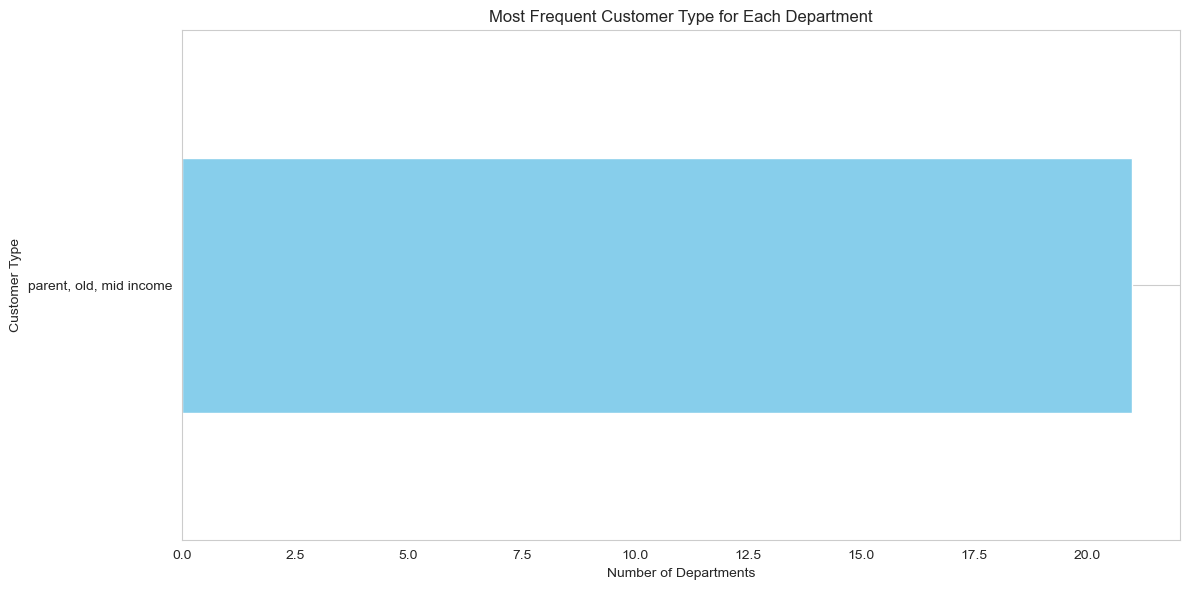

In [1165]:
# Group by Customer_type and department_id, and calculate the total orders
orders_by_customer_department = ords_prods_cust_clean.groupby(['Customer_type', 'department_id']).size().unstack()

# Find the Customer_type with the maximum orders for each department
max_customer_type = orders_by_customer_department.idxmax()

# Plot the results as a bar chart
plt.figure(figsize=(12, 6))
max_customer_type.value_counts().sort_index().plot(kind='barh', color='skyblue')
plt.title('Most Frequent Customer Type for Each Department')
plt.xlabel('Number of Departments')
plt.ylabel('Customer Type')
plt.grid(axis='x')  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [1166]:
ords_prods_cust_clean.columns

Index(['user_id', 'First Name', 'Last name', 'Gender', 'STATE', 'Age',
       'date_joined', 'dependents', 'fam_status', 'income', 'product_id',
       'product_name', 'aisle_id', 'department_id', 'prices', 'order_id',
       'order_number', 'orders_day_of_week', 'order_time_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered', '_merge',
       'price_range_loc', 'busiest_day', 'Busiest days', 'busiest_hours',
       'max_order', 'loyalty_flag', 'mean_product_price', 'spending flag',
       'Frequency flag', 'region', 'Customer_type', 'Age_Group'],
      dtype='object')

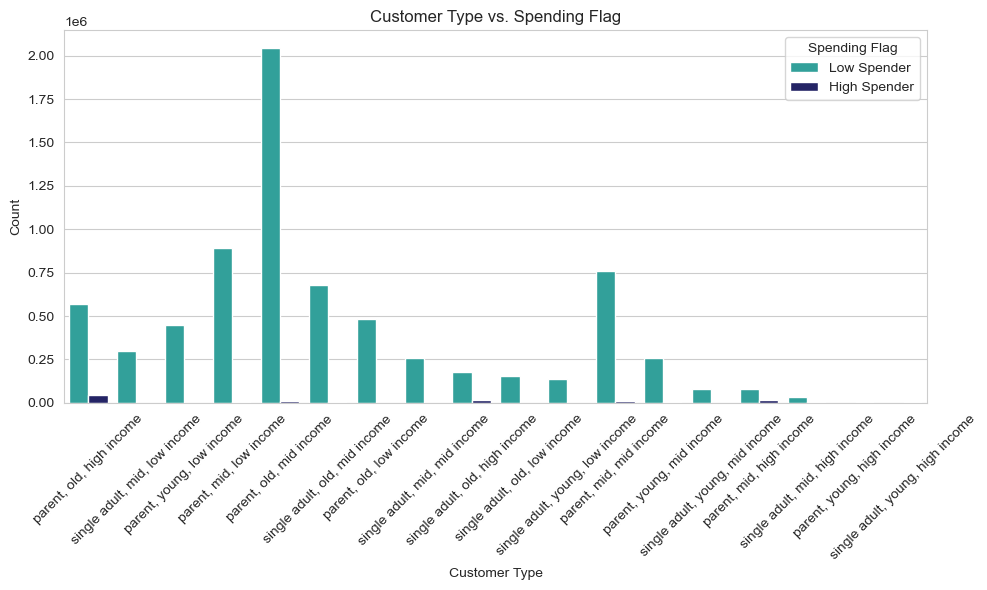

In [1167]:
# Define your custom color palette
colors = ['lightseagreen', 'midnightblue','c', 'mediumaquamarine']

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=ords_prods_cust_clean, x='Customer_type', hue='spending flag', palette=colors)
plt.title('Customer Type vs. Spending Flag')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.legend(title='Spending Flag')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [1191]:
# Save 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_type_spending_flag.png'))

<Figure size 640x480 with 0 Axes>

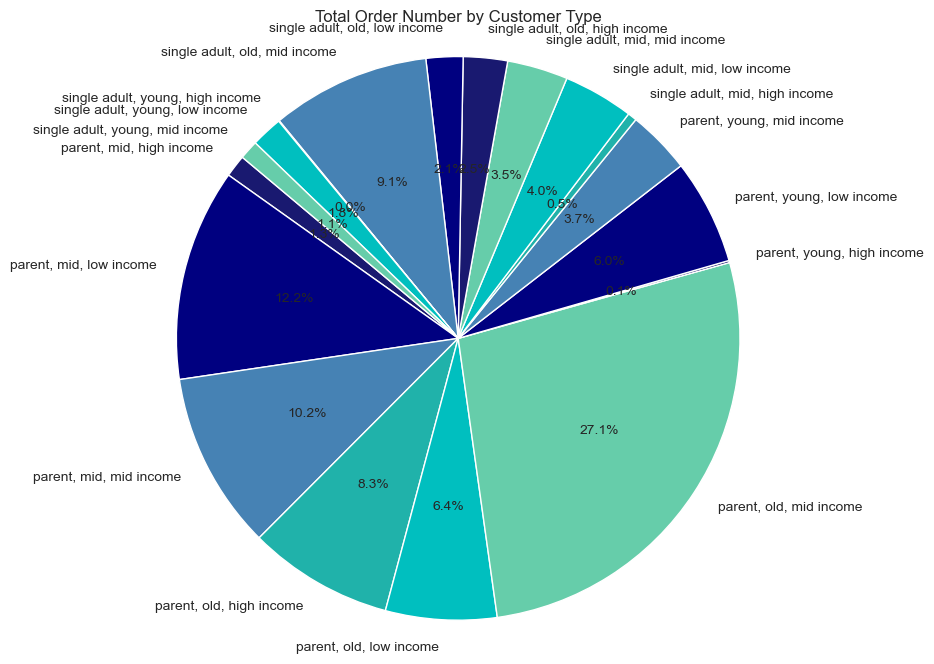

In [1168]:
# Aggregate total order number for each Customer_type
total_orders = ords_prods_cust_clean.groupby('Customer_type')['order_number'].sum()

# Color palette
colors = ['midnightblue', 'navy', 'steelblue', 'lightseagreen', 'c', 'mediumaquamarine']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_orders, labels=total_orders.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Total Order Number by Customer Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [1192]:
# Save 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_type_percentage.png'))

<Figure size 640x480 with 0 Axes>

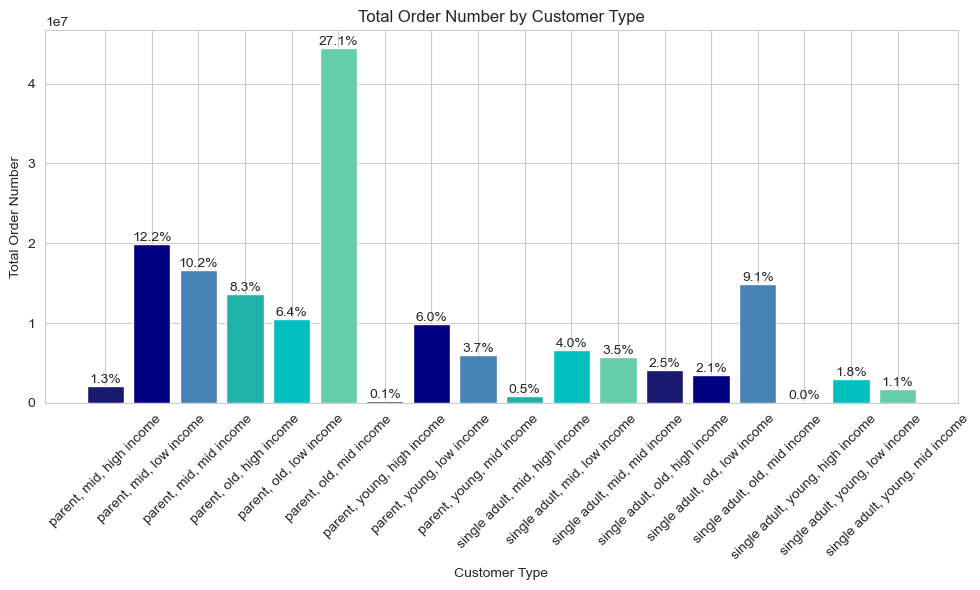

In [1169]:
# Aggregate total order number for each Customer_type
total_orders = ords_prods_cust_clean.groupby('Customer_type')['order_number'].sum()

# Calculate the total number of orders
total_orders_all = total_orders.sum()

# Calculate the percentages
percentages = (total_orders / total_orders_all) * 100

# Define color palette
colors = ['midnightblue', 'navy', 'steelblue', 'lightseagreen', 'c', 'mediumaquamarine']

# Plot the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(total_orders.index, total_orders, color=colors)

# Add percentages on top of each bar
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom')

plt.title('Total Order Number by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Order Number')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [1193]:
# Save 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'total_order_customer_type.png'))

<Figure size 640x480 with 0 Axes>

In [1170]:
# Count frequencies for price_range_loc
frequency_table = ords_prods_cust_clean['price_range_loc'].value_counts().reset_index()
frequency_table.columns = ['Price Range', 'Frequency']

# Display the table
print(frequency_table)

          Price Range  Frequency
0                 nan    4550375
1   Low-range product    2335835
2   Mid-range product     492460
3  High-range product      94295


In [1171]:
# Count frequencies for order_time_of_day
frequency_table = ords_prods_cust_clean['order_time_of_day'].value_counts().reset_index()
frequency_table.columns = ['Busiest Hour', 'Frequency']

# Display the table
print(frequency_table)

  Busiest Hour  Frequency
0      Evening    2632843
1    Afternoon    2496692
2       Midday    1308154
3        Night     924286
4      Morning     110990


In [1172]:
# Count frequencies for order_time_of_day
frequency_table = ords_prods_cust_clean['orders_day_of_week'].value_counts().reset_index()
frequency_table.columns = ['Busiest Day', 'Frequency']

# Display the table
print(frequency_table)

   Busiest Day  Frequency
0            0    1403531
1            1    1309409
2            6    1031283
3            5     986930
4            2     968505
5            3     890160
6            4     883147


In [1173]:
# Count frequencies for order_time_of_day
frequency_table = ords_prods_cust_clean['loyalty_flag'].value_counts().reset_index()
frequency_table.columns = ['Loyalty Flag', 'Frequency']

# Display the table
print(frequency_table)

       Loyalty Flag  Frequency
0  Regular customer    3903889
1    Loyal customer    2929845
2      New customer     639231


In [1174]:
# Count frequencies for order_time_of_day
frequency_table = ords_prods_cust_clean['region'].value_counts().reset_index()
frequency_table.columns = ['Region', 'Frequency']

# Display the table
print(frequency_table)

      Region  Frequency
0      South    2506436
1       West    1888340
2    Midwest    1737561
3  Northeast    1340628


In [1175]:
# Count frequencies for Age_Group
frequency_table = ords_prods_cust_clean['Age_Group'].value_counts().reset_index()
frequency_table.columns = ['Age Group', 'Frequency']

# Display the table
print(frequency_table)

  Age Group  Frequency
0     25-34    1181589
1     45-54    1174827
2     35-44    1163815
3     55-64    1152586
4     65-74    1150346
5     75-84     825560
6     18-24     824242


In [1176]:
# Count frequencies for mean_product_price
frequency_table = ords_prods_cust_clean['mean_product_price'].value_counts().reset_index()
frequency_table.columns = ['Mean Product Price', 'Frequency']

# Display the table
print(frequency_table)

       Mean Product Price  Frequency
0                7.447784       2722
1                6.884899       2679
2                7.500000       2496
3                6.986980       2424
4                7.414886       2403
...                   ...        ...
43329            9.820000          1
43330            7.315385          1
43331            6.437500          1
43332            8.273016          1
43333           10.330000          1

[43334 rows x 2 columns]


In [1177]:
ords_prods_cust_clean.head()

,user_id,First Name,Last name,Gender,STATE,Age,date_joined,dependents,fam_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_day,Busiest days,busiest_hours,max_order,loyalty_flag,mean_product_price,spending flag,Frequency flag,region,Customer_type,Age_Group
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2543867,5,1,Midday,30.0,2,0,both,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low Spender,Regular customer,Midwest,"parent, old, high income",45-54
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,1285508,7,5,Evening,11.0,1,1,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,Regular customer,Midwest,"parent, old, high income",45-54
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2578584,8,1,Evening,10.0,2,1,both,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low Spender,Regular customer,Midwest,"parent, old, high income",45-54
6,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,2543867,5,1,Midday,30.0,1,1,both,Low-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low Spender,Regular customer,Midwest,"parent, old, high income",45-54
7,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,2505178,6,1,Midday,21.0,1,1,both,Low-range product,Regularly busy,Busiest days,Average orders,8,New customer,7.988889,Low Spender,Regular customer,Midwest,"parent, old, high income",45-54


In [1178]:
# Exporting as pkl file
ords_prods_cust_clean.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_final.pkl'))